#Data Preprocessing

In [1]:
import pandas as pd

masses_data = pd.read_csv('/content/mammographic_masses.data.txt')
masses_data.head()

5  67  3 5.1 3.1  1
0  4  43  1   1   ?  1
1  5  58  4   5   3  1
2  4  28  1   1   3  0
3  5  74  1   5   ?  1
4  4  65  1   ?   3  0

In [2]:
masses_data = pd.read_csv('/content/mammographic_masses.data.txt', na_values=['?'], names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
masses_data.head()

BI-RADS   age  shape  margin  density  severity
0      5.0  67.0    3.0     5.0      3.0         1
1      4.0  43.0    1.0     1.0      NaN         1
2      5.0  58.0    4.0     5.0      3.0         1
3      4.0  28.0    1.0     1.0      3.0         0
4      5.0  74.0    1.0     5.0      NaN         1

In [3]:
masses_data.describe()

BI-RADS         age       shape      margin     density    severity
count  959.000000  956.000000  930.000000  913.000000  885.000000  961.000000
mean     4.348279   55.487448    2.721505    2.796276    2.910734    0.463059
std      1.783031   14.480131    1.242792    1.566546    0.380444    0.498893
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   45.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max     55.000000   96.000000    4.000000    5.000000    4.000000    1.000000

In [4]:
masses_data.loc[(masses_data['age'].isnull()) |
              (masses_data['shape'].isnull()) |
              (masses_data['margin'].isnull()) |
              (masses_data['density'].isnull())]

BI-RADS   age  shape  margin  density  severity
1        4.0  43.0    1.0     1.0      NaN         1
4        5.0  74.0    1.0     5.0      NaN         1
5        4.0  65.0    1.0     NaN      3.0         0
6        4.0  70.0    NaN     NaN      3.0         0
7        5.0  42.0    1.0     NaN      3.0         0
..       ...   ...    ...     ...      ...       ...
778      4.0  60.0    NaN     4.0      3.0         0
819      4.0  35.0    3.0     NaN      2.0         0
824      6.0  40.0    NaN     3.0      4.0         1
884      5.0   NaN    4.0     4.0      3.0         1
923      5.0   NaN    4.0     3.0      3.0         1

[130 rows x 6 columns]

In [5]:
masses_data.dropna(inplace=True)
masses_data.describe()

BI-RADS         age       shape      margin     density    severity
count  830.000000  830.000000  830.000000  830.000000  830.000000  830.000000
mean     4.393976   55.781928    2.781928    2.813253    2.915663    0.485542
std      1.888371   14.671782    1.242361    1.567175    0.350936    0.500092
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   46.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max     55.000000   96.000000    4.000000    5.000000    4.000000    1.000000

## Extracting Features

In [6]:
all_features = masses_data[['age', 'shape',
                             'margin', 'density']].values


all_classes = masses_data['severity'].values

feature_names = ['age', 'shape', 'margin', 'density']


In [7]:
all_features

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [8]:
all_classes

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,

In [9]:
totalYes = sum(all_classes)
totalNo = len(all_classes) - totalYes

totalYes , totalNo

(403, 427)

In [10]:
from numpy import savetxt

savetxt('data.csv' , all_features , delimiter=',')
savetxt('classes.csv' , all_classes , delimiter=',')

##Normalizing the data


In [11]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

## Test-Train Split (75% data)

In [12]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1234)

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_features_scaled, all_classes, train_size=0.75, random_state=1)

# Decision Trees

In [13]:
from sklearn.tree import DecisionTreeClassifier

decisionTreeClassifier = DecisionTreeClassifier(random_state=1)

# Trainnng the classifier on the training set
decisionTreeClassifier.fit(training_inputs, training_classes)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

## Displaying decision Tree
i got this code online

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


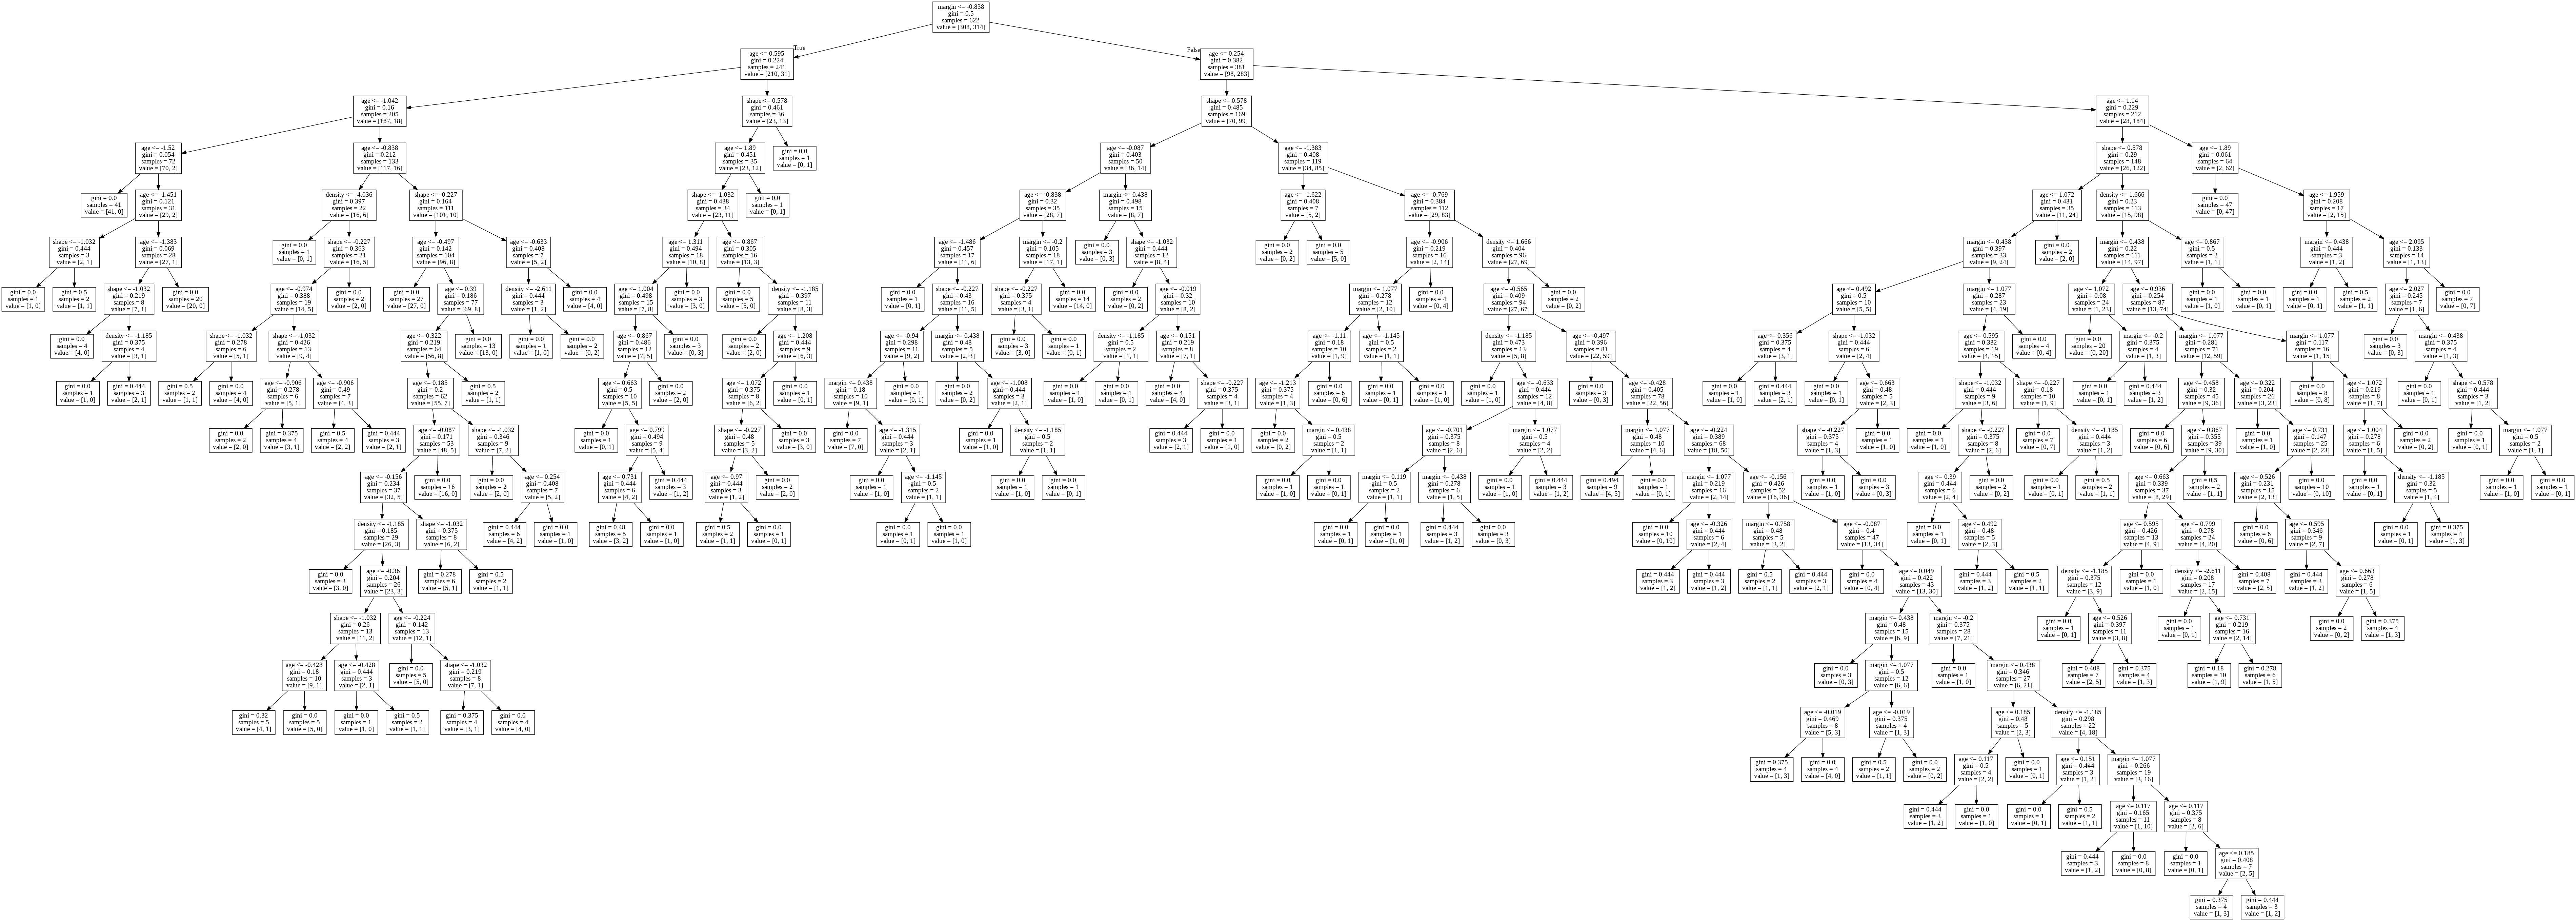

In [14]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn import tree
from pydotplus import graph_from_dot_data 

dot_data = StringIO()  
tree.export_graphviz(decisionTreeClassifier, out_file=dot_data,  
                         feature_names=feature_names)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [15]:
decisionTreeClassifier.score(testing_inputs, testing_classes)

0.7355769230769231

## k-Cross Validation
 sklearn provides a direct api to do this
 otherwise we can use different api to manually do this
 in a loop with training as testing data randomly sampled at every loop

###for k = 10

In [16]:
from sklearn.model_selection import cross_val_score

decisionTreeClassifierKCross = DecisionTreeClassifier(random_state=1)

crossValidationScores = cross_val_score(decisionTreeClassifierKCross, all_features_scaled, all_classes, cv=10)

crossValidationScores.mean()

0.7373493975903613

###for k = 5

In [17]:
from sklearn.model_selection import cross_val_score

decisionTreeClassifierKCross = DecisionTreeClassifier(random_state=1)

crossValidationScores = cross_val_score(decisionTreeClassifierKCross, all_features_scaled, all_classes, cv=5)

crossValidationScores.mean()

0.7253012048192771

for k = 20

In [18]:
from sklearn.model_selection import cross_val_score

decisionTreeClassifierKCross = DecisionTreeClassifier(random_state=1)

crossValidationScores = cross_val_score(decisionTreeClassifierKCross, all_features_scaled, all_classes, cv=20)

crossValidationScores.mean()

0.7710511033681767

##Random Forest
## Ensemble learning
## Creating specified number of trees and then they all will vote on the final classification

### n = 100

In [19]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassifier100 = RandomForestClassifier(n_estimators=100)

randomForestClassifier100.fit(training_inputs, training_classes)
randomForestClassifier100.score(testing_inputs , testing_classes)

0.7692307692307693

###n=200

In [20]:
randomForestClassifier200 = RandomForestClassifier(n_estimators=200)

randomForestClassifier200.fit(training_inputs, training_classes)
randomForestClassifier200.score(testing_inputs , testing_classes)

0.7596153846153846

##K-Cross Validation
###n = 100
 k = 10

In [21]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassifier100 = RandomForestClassifier(n_estimators=100)
randomForestClassifier100_10Cross = cross_val_score(randomForestClassifier100, all_features_scaled, all_classes, cv=10)

randomForestClassifier100_10Cross.mean()

0.755421686746988

k = 20

In [22]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassifier100 = RandomForestClassifier(n_estimators=100)
randomForestClassifier100_20Cross = cross_val_score(randomForestClassifier100, all_features_scaled, all_classes, cv=20)

randomForestClassifier100_20Cross.mean()

0.7756968641114983

###n = 200
k = 10

In [23]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassifier200 = RandomForestClassifier(n_estimators=200)
randomForestClassifier200_10Cross = cross_val_score(randomForestClassifier100, all_features_scaled, all_classes, cv=10)

randomForestClassifier200_10Cross.mean()

0.7566265060240964

k = 20

In [24]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassifier200 = RandomForestClassifier(n_estimators=200)
randomForestClassifier200_10Cross = cross_val_score(randomForestClassifier100, all_features_scaled, all_classes, cv=20)

randomForestClassifier200_10Cross.mean()

0.7697444831591175

#K-Means and KNN
KNN done on different file (Implemented Algorithms Folder)


##K-Means

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random


kmeans = KMeans(n_clusters=2)

scaledFeatures = scale(all_features)

kmeans.fit(scaledFeatures)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
from sklearn.metrics import accuracy_score
print("Accuracy of K-means is : ",accuracy_score(kmeans.labels_ , all_classes))

Accuracy of K-means is :  0.20240963855421687


#Support Vector Machine (SVM)

###Linear Kernal

In [27]:
from sklearn import svm

C = 1.0
kernal = 'linear'
svc = svm.SVC(kernel=kernal, C=C)

svc.fit(training_inputs, training_classes)

print("Test-Train Split Score : " , svc.score(testing_inputs , testing_classes))

svcKCross = svm.SVC(kernel=kernal, C=C)
svcKCrossScores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
print("K-Cross Score (k = %d) : "%10 , svcKCrossScores.mean())
svcKCrossScores = cross_val_score(svc, all_features_scaled, all_classes, cv=20)
print("K-Cross Score (k = %d) : "%20 , svcKCrossScores.mean())


Test-Train Split Score :  0.7692307692307693
K-Cross Score (k = 10) :  0.7975903614457832
K-Cross Score (k = 20) :  0.8036004645760745


###RBF Kernal

In [28]:
from sklearn import svm

C = 1.0
kernal = 'rbf'
svc = svm.SVC(kernel=kernal, C=C)

svc.fit(training_inputs, training_classes)

print("Test-Train Split Score : " , svc.score(testing_inputs , testing_classes))

svcKCross = svm.SVC(kernel=kernal, C=C)
svcKCrossScores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
print("K-Cross Score (k = %d) : "%10 , svcKCrossScores.mean())
svcKCrossScores = cross_val_score(svc, all_features_scaled, all_classes, cv=20)
print("K-Cross Score (k = %d) : "%20 , svcKCrossScores.mean())


Test-Train Split Score :  0.7788461538461539
K-Cross Score (k = 10) :  0.8012048192771084
K-Cross Score (k = 20) :  0.8046457607433218


###Sigmoid Kernal

In [29]:
from sklearn import svm

C = 1.0
kernal = 'sigmoid'
svc = svm.SVC(kernel=kernal, C=C)

svc.fit(training_inputs, training_classes)

print("Test-Train Split Score : " , svc.score(testing_inputs , testing_classes))

svcKCross = svm.SVC(kernel=kernal, C=C)
svcKCrossScores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
print("K-Cross Score (k = %d) : "%10 , svcKCrossScores.mean())
svcKCrossScores = cross_val_score(svc, all_features_scaled, all_classes, cv=20)
print("K-Cross Score (k = %d) : "%20 , svcKCrossScores.mean())


Test-Train Split Score :  0.7067307692307693
K-Cross Score (k = 10) :  0.7457831325301204
K-Cross Score (k = 20) :  0.7364401858304298


###Polynomial Kernal

In [30]:
from sklearn import svm

C = 1.0
kernal = 'poly'
svc = svm.SVC(kernel=kernal, C=C)

svc.fit(training_inputs, training_classes)

print("Test-Train Split Score : " , svc.score(testing_inputs , testing_classes))

svcKCross = svm.SVC(kernel=kernal, C=C)
svcKCrossScores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
print("K-Cross Score (k = %d) : "%10 , svcKCrossScores.mean())
svcKCrossScores = cross_val_score(svc, all_features_scaled, all_classes, cv=20)
print("K-Cross Score (k = %d) : "%20 , svcKCrossScores.mean())


Test-Train Split Score :  0.75
K-Cross Score (k = 10) :  0.7903614457831326
K-Cross Score (k = 20) :  0.7853077816492452


# Naive Bayes

In [31]:
import numpy
from sklearn.model_selection import train_test_split

scaler = preprocessing.MinMaxScaler()
#scaling the data b/w minimum and maximum

all_featuresMinMax = scaler.fit_transform(all_features)

numpy.random.seed(1234)

(training_inputsMinMax,
 testing_inputsMinMax,
 training_classesMinMax,
 testing_classesMinMax) = train_test_split(all_featuresMinMax, all_classes, train_size=0.75, random_state=1)



In [32]:
from sklearn.naive_bayes import MultinomialNB

naiveBayesClassifier = MultinomialNB()

naiveBayesClassifier.fit(training_inputsMinMax , training_classesMinMax)

print("Test-Train Split Score : " , naiveBayesClassifier.score( testing_inputsMinMax, testing_classesMinMax))

naiveBayesClassifierKCross = MultinomialNB()

naiveBayesClassifierKCrossScore10 = cross_val_score(naiveBayesClassifierKCross, all_featuresMinMax, all_classes, cv=10)
print("K-Cross Score (k = %d) : "%10 , naiveBayesClassifierKCrossScore10.mean())

naiveBayesClassifierKCrossScore20 = cross_val_score(naiveBayesClassifierKCross, all_featuresMinMax, all_classes, cv=20)
print("K-Cross Score (k = %d) : "%20 , naiveBayesClassifierKCrossScore20.mean())


Test-Train Split Score :  0.7548076923076923
K-Cross Score (k = 10) :  0.7855421686746988
K-Cross Score (k = 20) :  0.7829558652729385


#Artificial Neural Network
Using keras Api

In [33]:
from sklearn import preprocessing
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1234)

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_features_scaled, all_classes, train_size=0.66, random_state=1)

##Adding Dropout and l2 Regularisation to avoid overfitting

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout
import tensorflow


inputSize = training_inputs[0].shape

model = Sequential()

model.add(Dense(10 , input_shape=inputSize , kernel_regularizer='l2'))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(30 , kernel_regularizer='l2'))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(10 , kernel_regularizer='l2'))
model.add(Activation('relu'))

model.add(Dense(1 , kernel_regularizer='l2'))
model.add(Activation('sigmoid'))

optimizer = tensorflow.keras.optimizers.RMSprop()
model.compile(loss='binary_crossentropy' , optimizer=optimizer , metrics = ['accuracy'])

print(model.summary())




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 activation_1 (Activation)   (None, 30)                0         
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                3

##Visualizing The Model

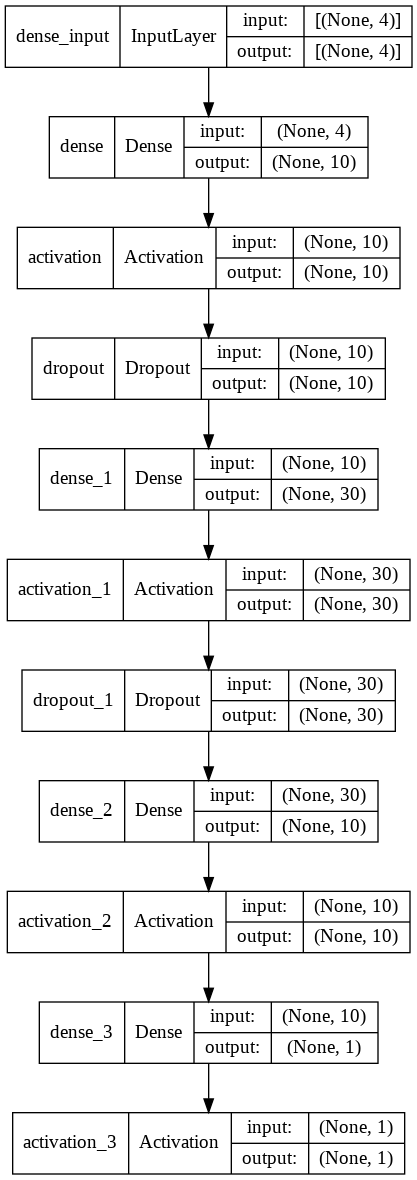

In [35]:
from keras.utils.vis_utils import plot_model
import matplotlib.image as mpimg


# Generate the plot
plot_model(model, to_file ='model.png',
           show_shapes = True,
           show_layer_names = True)


##Training the model

In [36]:
epochs = 50
batch = 4
history = model.fit(training_inputs , training_classes , epochs = epochs
                    ,batch_size=batch , verbose=1 ,
          validation_data = (testing_inputs , testing_classes))

Epoch 1/50
137/137 [==============================] - 2s 4ms/step - loss: 0.9270 - accuracy: 0.7002 - val_loss: 0.8630 - val_accuracy: 0.7350
Epoch 2/50
137/137 [==============================] - 0s 3ms/step - loss: 0.7832 - accuracy: 0.7642 - val_loss: 0.7579 - val_accuracy: 0.7915
Epoch 3/50
137/137 [==============================] - 0s 3ms/step - loss: 0.7275 - accuracy: 0.7898 - val_loss: 0.6998 - val_accuracy: 0.8021
Epoch 4/50
137/137 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.7952 - val_loss: 0.6749 - val_accuracy: 0.7951
Epoch 5/50
137/137 [==============================] - 0s 3ms/step - loss: 0.6496 - accuracy: 0.8080 - val_loss: 0.6454 - val_accuracy: 0.7986
Epoch 6/50
137/137 [==============================] - 0s 3ms/step - loss: 0.6196 - accuracy: 0.7989 - val_loss: 0.6334 - val_accuracy: 0.7951
Epoch 7/50
137/137 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.7952 - val_loss: 0.6185 - val_accuracy: 0.7951
Epoch 

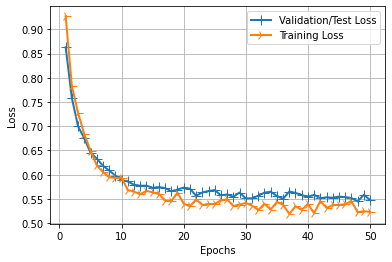

In [37]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()




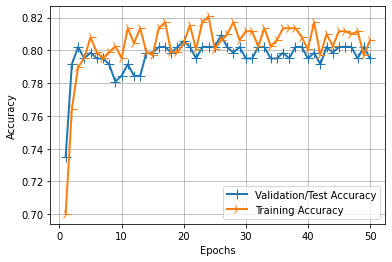

In [38]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

##K-Cross Validation on Neural Networks

In [39]:
def createModel():
  import keras
  from keras.models import Sequential
  from keras.layers import Dense , Activation , Dropout
  import tensorflow


  inputSize = (4,)

  model = Sequential()

  model.add(Dense(10 , input_shape=inputSize , kernel_regularizer='l2'))
  model.add(Activation('relu'))
  model.add(Dropout(0.3))

  model.add(Dense(30 , kernel_regularizer='l2'))
  model.add(Activation('relu'))
  model.add(Dropout(0.4))

  model.add(Dense(10 , kernel_regularizer='l2'))
  model.add(Activation('relu'))

  model.add(Dense(1 , kernel_regularizer='l2'))
  model.add(Activation('sigmoid'))

  optimizer = tensorflow.keras.optimizers.RMSprop()
  model.compile(loss='binary_crossentropy' , optimizer=optimizer , metrics = ['accuracy'])

  return model





In [40]:
KcrossModel = createModel()
print(KcrossModel.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                50        
                                                                 
 activation_4 (Activation)   (None, 10)                0         
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 30)                330       
                                                                 
 activation_5 (Activation)   (None, 30)                0         
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                                 
 dense_6 (Dense)             (None, 10)               

##For K-Cross Validation we wrap our model in an estimator that is compatible with sklearn

In [41]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Wrap our Keras model
estimator = KerasClassifier(build_fn=createModel, epochs=50, verbose=0)
# Now we can use scikit_learn's cross_val_score to evaluate this model
CrossValidationScoresNeuralNet = cross_val_score(estimator, all_features_scaled, all_classes, cv=10)
print('\n\n\n')

print("Average Accuracy with k = %d is : "%10,CrossValidationScoresNeuralNet.mean())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  after removing the cwd from sys.path.






Average Accuracy with k = 10 is :  0.8072289109230042


#Principal Component Analysis (PCA)
PCA is a dimensionality reduction technique; it lets you distill multi-dimensional data down to fewer dimensions, selecting new dimensions that preserve variance in the data as best it can.

In [42]:
from sklearn.decomposition import PCA


##With 2 components

In [43]:
pca2 = PCA(n_components=2, whiten=True).fit(all_features)
allFeaturesPCA2 = pca2.transform(all_features)

### lets see how much varience we preserved


In [44]:
print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))

[0.98424958 0.01295367]
0.9972032568350249


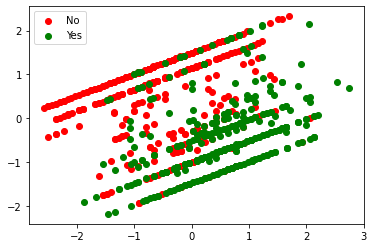

In [45]:
%matplotlib inline
import pylab as pl
from pylab import *
from itertools import cycle


colors = cycle('rgb')
target_ids = range(2)
pl.figure()
for i, c, label in zip(target_ids, colors, ["No" , "Yes"]):
    pl.scatter(allFeaturesPCA2[all_classes == i, 0], allFeaturesPCA2[all_classes == i, 1],
        c=c, label=label)
pl.legend()
pl.show()
    

###Kmeans on PCA with n = 2

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random


kmeansPCA2 = KMeans(n_clusters=2)

scaledFeaturesPCA2 = scale(allFeaturesPCA2)

kmeansPCA2.fit(scaledFeaturesPCA2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
from sklearn.metrics import accuracy_score
print("Accuracy of K-means is : ",accuracy_score(kmeansPCA2.labels_ , all_classes))

Accuracy of K-means is :  0.7939759036144578


In [48]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1234)

(training_inputsPCA2,
 testing_inputsPCA2,
 training_classesPCA2,
 testing_classesPCA2) = train_test_split(scaledFeaturesPCA2, all_classes, train_size=0.75, random_state=1)

##SVM with 2 components

In [49]:
from sklearn import svm

C = 1.0
kernal = 'linear'
svc = svm.SVC(kernel=kernal, C=C)

svc.fit(training_inputsPCA2, training_classesPCA2)

print("Test-Train Split Score : " , svc.score(testing_inputsPCA2 , testing_classesPCA2))

svcKCross = svm.SVC(kernel=kernal, C=C)
svcKCrossScores = cross_val_score(svc, scaledFeaturesPCA2, all_classes, cv=10)
print("K-Cross Score (k = %d) : "%10 , svcKCrossScores.mean())
svcKCrossScores = cross_val_score(svc, scaledFeaturesPCA2, all_classes, cv=20)
print("K-Cross Score (k = %d) : "%20 , svcKCrossScores.mean())


Test-Train Split Score :  0.7548076923076923
K-Cross Score (k = 10) :  0.7915662650602411
K-Cross Score (k = 20) :  0.7901277584204414


##With 3 components

In [50]:

pca3 = PCA(n_components=3, whiten=True).fit(all_features)
allFeaturesPCA3 = pca3.transform(all_features)


###Lets see how much varience we captured

In [51]:
print(pca3.explained_variance_ratio_)
print(sum(pca3.explained_variance_ratio_))

[0.98424958 0.01295367 0.00224542]
0.9994486808625002


##Kmeans with PCA n = 3

In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random


kmeansPCA3 = KMeans(n_clusters=2)

scaledFeaturesPCA3 = scale(allFeaturesPCA3)

kmeansPCA3.fit(scaledFeaturesPCA3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [53]:
from sklearn.metrics import accuracy_score
print("Accuracy of K-means is : ",accuracy_score(1-kmeansPCA3.labels_ , all_classes))

Accuracy of K-means is :  0.2289156626506024


In [54]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1234)

(training_inputsPCA3,
 testing_inputsPCA3,
 training_classesPCA3,
 testing_classesPCA3) = train_test_split(scaledFeaturesPCA3, all_classes, train_size=0.75, random_state=1)

##SVM with 3 components

In [55]:
from sklearn import svm

C = 1.0
kernal = 'linear'
svc = svm.SVC(kernel=kernal, C=C)

svc.fit(training_inputsPCA3, training_classesPCA3)

print("Test-Train Split Score : " , svc.score(testing_inputsPCA3 , testing_classesPCA3))

svcKCross = svm.SVC(kernel=kernal, C=C)
svcKCrossScores = cross_val_score(svc, scaledFeaturesPCA3, all_classes, cv=10)
print("K-Cross Score (k = %d) : "%10 , svcKCrossScores.mean())
svcKCrossScores = cross_val_score(svc, scaledFeaturesPCA3, all_classes, cv=20)
print("K-Cross Score (k = %d) : "%20 , svcKCrossScores.mean())


Test-Train Split Score :  0.7692307692307693
K-Cross Score (k = 10) :  0.7975903614457832
K-Cross Score (k = 20) :  0.8036004645760745


#Ensemble Approach


In [56]:
class Ensemble:
  def __init__(self , data , classes):
    self.data = data
    self.classes = classes
    self.NNModel = self.createNNModel()
    self.NBClassifier = self.createNBModel()
    self.SVCLinear = self.createSVMModel('linear')
    self.DT = self.createDTModel()
    self.RF = self.createRFModel(100)





  def createNNModel(self):
    import keras
    from keras.models import Sequential
    from keras.layers import Dense , Activation , Dropout
    import tensorflow


    inputSize = (4,)

    model = Sequential()

    model.add(Dense(10 , input_shape=inputSize , kernel_regularizer='l2'))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))

    model.add(Dense(30 , kernel_regularizer='l2'))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(Dense(10 , kernel_regularizer='l2'))
    model.add(Activation('relu'))

    model.add(Dense(1 , kernel_regularizer='l2'))
    model.add(Activation('sigmoid'))

    optimizer = tensorflow.keras.optimizers.RMSprop()
    model.compile(loss='binary_crossentropy' , optimizer=optimizer , metrics = ['accuracy'])

    return model




  def createNBModel(self):
    from sklearn.naive_bayes import MultinomialNB

    naiveBayesClassifier = MultinomialNB()

    return naiveBayesClassifier


  def createSVMModel(self , kernal):
    from sklearn import svm
    C = 1.0
    svc = svm.SVC(kernel=kernal, C=C)

    return svc

  def createDTModel(self):
    from sklearn.tree import DecisionTreeClassifier

    decisionTreeClassifier = DecisionTreeClassifier(random_state=1)

    return decisionTreeClassifier

  def createRFModel(self , estimators):
    from sklearn.ensemble import RandomForestClassifier

    randomForestClassifier = RandomForestClassifier(n_estimators=estimators)

    return randomForestClassifier




  def trainModels(self):



    from sklearn import preprocessing
    import numpy
    from sklearn.model_selection import train_test_split
    all_features = self.data
    all_classes = self.classes

    scaler = preprocessing.StandardScaler()
    all_features_scaled = scaler.fit_transform(all_features)
    all_features_scaled

    numpy.random.seed(1234)

    (training_inputsDT,
    testing_inputsDT,
    training_classesDT,
    testing_classesDT) = train_test_split(all_features_scaled, all_classes, train_size=0.75, random_state=1)

    print("Training Decision Tree")
    self.DT.fit(training_inputsDT,training_classesDT)
    print("DT Score : " , self.DT.score( testing_inputsDT,testing_classesDT))
    print('\n\n\n')
    print("Training Random Forest")

    (training_inputsRF,
    testing_inputsRF,
    training_classesRF,
    testing_classesRF) = train_test_split(all_features_scaled, all_classes, train_size=0.75, random_state=1)

    self.RF.fit(training_inputsRF,training_classesRF)

    print("RF Score : " , self.RF.score(testing_inputsRF,testing_classesRF))

    print('\n\n\n')
    print("Training Support Vector Machine")

    (training_inputsSVC,
    testing_inputsSVC,
    training_classesSVC,
    testing_classesSVC) = train_test_split(all_features_scaled, all_classes, train_size=0.75, random_state=1)

    self.SVCLinear.fit(training_inputsSVC, training_classesSVC)

    print("SVM Score : " , self.SVCLinear.score( testing_inputsSVC,testing_classesSVC))

    print('\n\n\n')
    print("Training Naive Bayes")

    (training_inputsNB,
    testing_inputsNB,
    training_classesNB,
    testing_classesNB) = train_test_split(all_features, all_classes, train_size=0.75, random_state=1)

    self.NBClassifier.fit(training_inputsNB,training_classesNB)
    print("Naive Bayes Score : " , self.NBClassifier.score(testing_inputsNB,testing_classesNB))

    print('\n\n\n')
    print("Training Neural Network")

    (training_inputsNN,
    testing_inputsNN,
    training_classesNN,
    testing_classesNN) = train_test_split(all_features_scaled, all_classes, train_size=0.75, random_state=1)
    self.NNModel.fit(training_inputsNN, training_classesNN, epochs = 20 , batch_size = 1, verbose = 1,
                     validation_data = (testing_inputsNN,testing_classesNN))





  def predict(self , feature_in):
    a = 5
    norm = np.linalg.norm(feature_in)

    feature = np.array([feature_in/norm])
    feature_inNB = np.array([feature_in])
    nn = self.NNModel.predict(feature)[0]
    # print(nn)
    if nn<0.8:
      nn = 0
    else:
      nn = 1
    nb = self.NBClassifier.predict(feature_inNB)[0]
    svc = self.SVCLinear.predict(feature)[0]
    dt = self.DT.predict(feature)[0]
    rf = self.RF.predict(feature)[0]
    # print([nn , nb , svc , dt , rf])
    tval = (nn+nb+svc+dt+rf)/a
    # print(tval)
    if tval>=0.7:
      return 1
    return 0

  def accuracy(self):

    (training_inputs,
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(self.data, self.classes, train_size=0.5, random_state=1)
    from sklearn import metrics
    predictions = []
    for row in testing_inputs:
      predictions.append(self.predict(row))
    predictions = np.array(predictions)

    print("Accuracy:",metrics.accuracy_score(testing_classes, predictions))

    

    








In [57]:
ensemble = Ensemble(all_features , all_classes)
ensemble.trainModels()

Training Decision Tree
DT Score :  0.7355769230769231




Training Random Forest
RF Score :  0.7692307692307693




Training Support Vector Machine
SVM Score :  0.7692307692307693




Training Naive Bayes
Naive Bayes Score :  0.75




Training Neural Network
Epoch 1/20
622/622 [==============================] - 2s 2ms/step - loss: 0.7571 - accuracy: 0.7508 - val_loss: 0.6382 - val_accuracy: 0.7596
Epoch 2/20
622/622 [==============================] - 1s 2ms/step - loss: 0.6107 - accuracy: 0.8071 - val_loss: 0.6072 - val_accuracy: 0.7837
Epoch 3/20
622/622 [==============================] - 1s 2ms/step - loss: 0.6034 - accuracy: 0.7974 - val_loss: 0.5926 - val_accuracy: 0.7885
Epoch 4/20
622/622 [==============================] - 1s 2ms/step - loss: 0.6181 - accuracy: 0.8055 - val_loss: 0.5873 - val_accuracy: 0.7885
Epoch 5/20
622/622 [==============================] - 1s 2ms/step - loss: 0.5885 - accuracy: 0.8039 - val_loss: 0.5901 - val_accuracy: 0.7885
Epoch 6/20
622/622 [===========

In [58]:
ensemble.accuracy()

Accuracy: 0.5421686746987951
